Using Gemini, generated a function that randomly makes graphs and saved the data in a csv file.


In [21]:
import random
import networkx as nx

def generate_random_graph(num_vertices, num_edges):
    if num_edges > num_vertices * (num_vertices - 1) // 2:
        raise ValueError("Number of edges exceeds the maximum possible edges for the given number of vertices.")

    graph = nx.Graph()
    graph.add_nodes_from(range(1, num_vertices + 1))

    while graph.number_of_edges() < num_edges:
        u = random.randint(1, num_vertices)
        v = random.randint(1, num_vertices)
        if u != v and not graph.has_edge(u, v):
            graph.add_edge(u, v)
    return graph

graphs = {}
num_vertices = 10
for num_edges in range(10, 46, 10):
    graphs[num_edges] = generate_random_graph(num_vertices, num_edges)

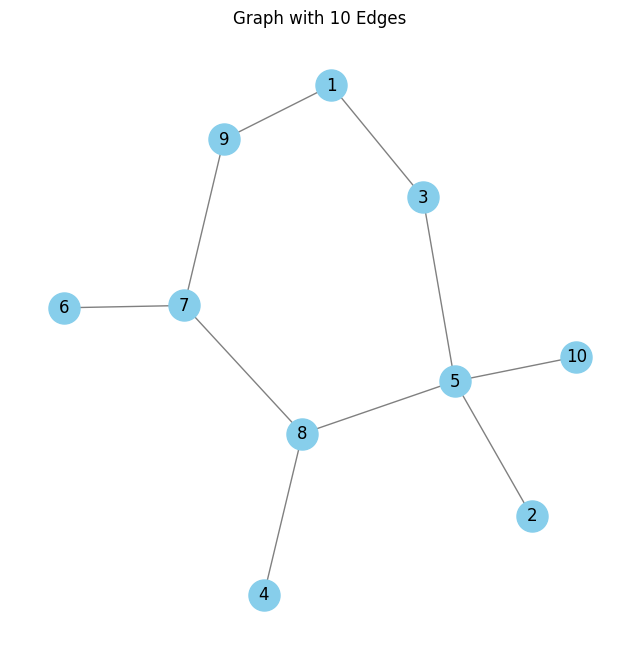

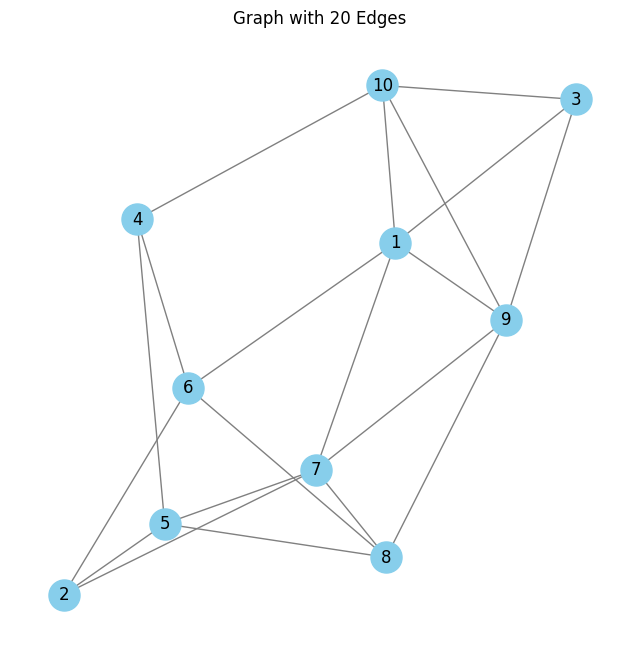

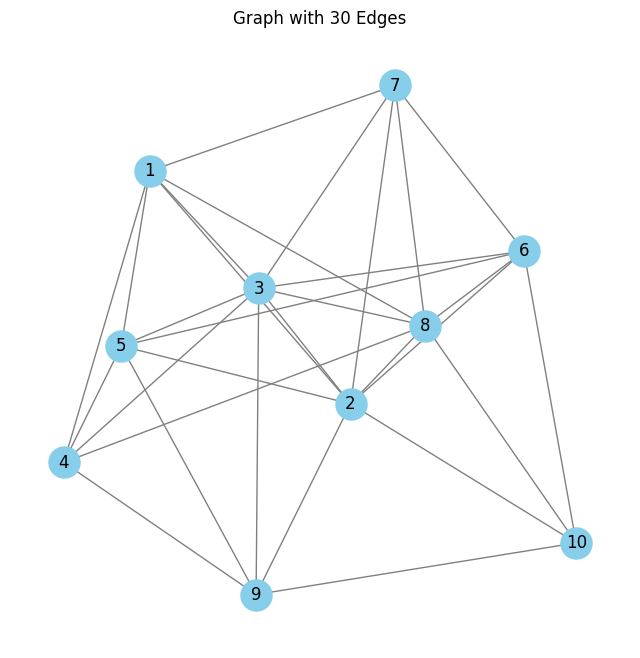

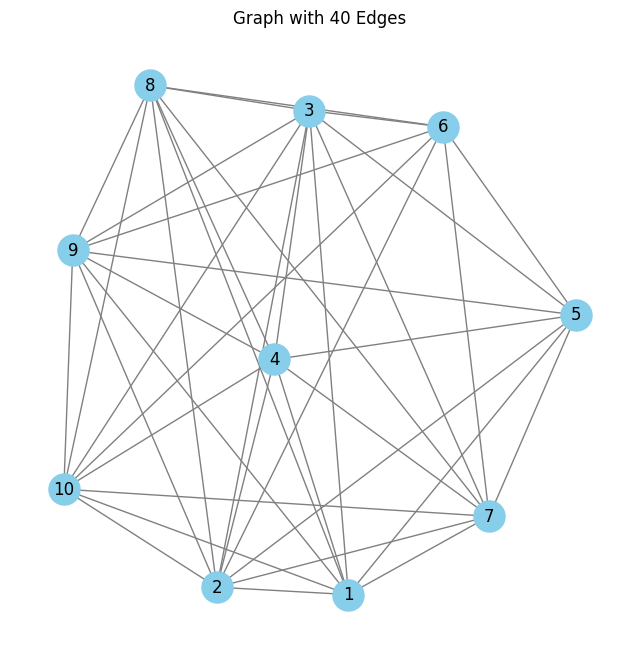

In [22]:
import matplotlib.pyplot as plt

for num_edges, graph in graphs.items():
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw(graph, with_labels=True, ax=ax, node_size=500, node_color='skyblue', edge_color='gray')
    ax.set_title(f"Graph with {num_edges} Edges")
    plt.show()

In [23]:
import csv

csv_file_path = 'graph_data.csv'

with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Number of Edges', 'Edges'])

    for num_edges, graph in graphs.items():
        for u, v in graph.edges():
            csv_writer.writerow([num_edges, f"({u}, {v})"])

print(f"Graph data exported to {csv_file_path}")

Graph data exported to graph_data.csv


Using ChatGPT to convert csv into individual text files.

In [25]:
for num_edges, graph in graphs.items():
    txt_file_path = f'graph_data_{num_edges}_edges.txt'
    with open(txt_file_path, 'w') as txtfile:
        for u, v in graph.edges():
            txtfile.write(f"({u}, {v})\n")

    print(f"Graph data with {num_edges} edges exported to {txt_file_path}")

Graph data with 10 edges exported to graph_data_10_edges.txt
Graph data with 20 edges exported to graph_data_20_edges.txt
Graph data with 30 edges exported to graph_data_30_edges.txt
Graph data with 40 edges exported to graph_data_40_edges.txt
